In [40]:
import pandas as pd
import matplotlib.pyplot as plt

import python.plots as plots

# Read and prepare data

In [2]:
daily_df = pd.read_csv('data/processed/daily_aggregated_df.csv')

In [32]:
daily_df

,dispatch_date,violent_offense_count,felony_count,misdemeanor_count,year,year_group,dispatch_wday,dispatch_month,dispatch_quarter,tmax,tmin
0,2006-01-01,73,91,167,2006,2006-2009,Sunday,January,1,45.0,35.0
1,2006-01-02,52,75,110,2006,2006-2009,Monday,January,1,46.0,35.0
2,2006-01-03,62,93,88,2006,2006-2009,Tuesday,January,1,46.0,39.0
3,2006-01-04,53,71,111,2006,2006-2009,Wednesday,January,1,46.0,37.0
4,2006-01-05,43,54,99,2006,2006-2009,Thursday,January,1,51.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...
5943,2022-11-26,40,89,69,2022,2018-2022,Saturday,November,4,58.0,41.0
5944,2022-11-27,36,95,69,2022,2018-2022,Sunday,November,4,58.0,45.0
5945,2022-11-28,44,109,129,2022,2018-2022,Monday,November,4,62.0,48.0
5946,2022-11-29,41,82,96,2022,2018-2022,Tuesday,November,4,54.0,38.0


In [8]:
# quater will be a categorical variable
data = daily_df.assign(dispatch_quarter=pd.Categorical(daily_df['dispatch_quarter'],
                                                       categories=[1, 2, 3, 4],
                                                       ordered=True).
                       rename_categories(['Q1', 'Q2', 'Q3', 'Q4']))


# Log(Violent Offense) by Year

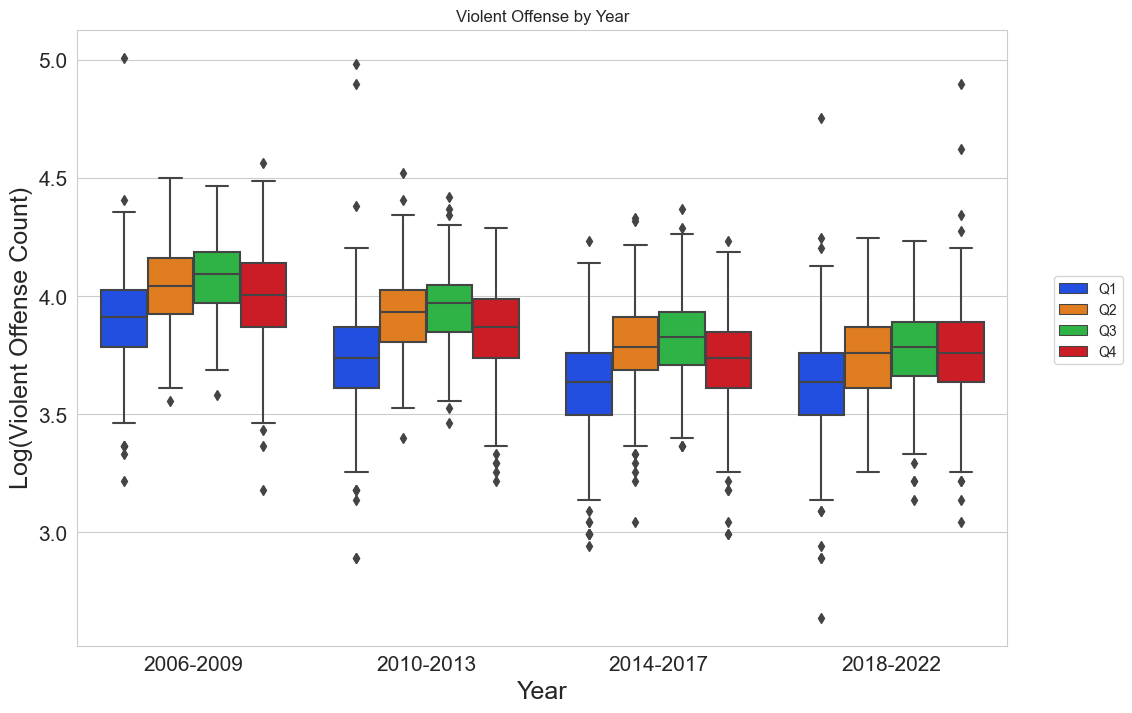

In [37]:
fig = plots.plot_boxplot_by_year(data, 'violent_offense_count', 'Violent Offense Count', 'Violent Offense by Year')
filename = "vo_by_year"
plt.savefig('presentation/figures/{}.png'.format(filename), bbox_inches='tight')

# Log(Misdemeanor) by Year

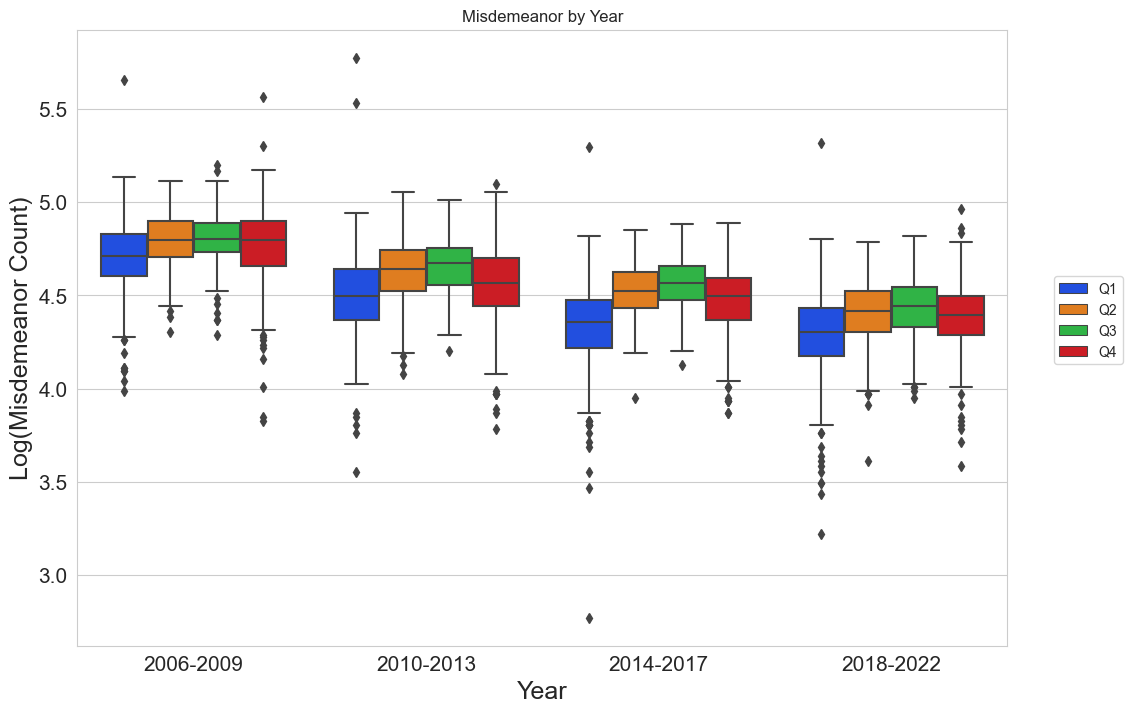

In [38]:
fig = plots.plot_boxplot_by_year(data, 'misdemeanor_count', 'Misdemeanor Count', 'Misdemeanor by Year')
filename = "mis_by_year"
plt.savefig('presentation/figures/{}.png'.format(filename), bbox_inches='tight')

# Log(Felony) by Year

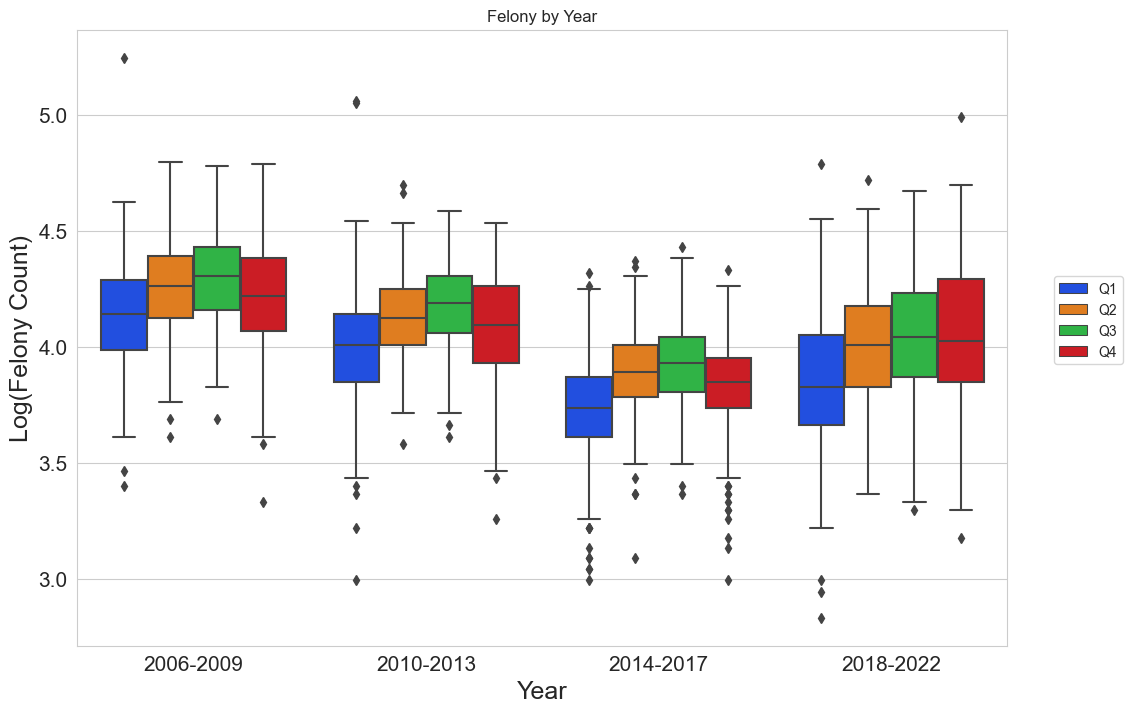

In [39]:
fig = plots.plot_boxplot_by_year(data, 'felony_count', 'Felony Count', 'Felony by Year')
filename = "fel_by_year"
plt.savefig('presentation/figures/{}.png'.format(filename), bbox_inches='tight')

# Trend of Crime Incidents by Daily Temperature

In [46]:
df = (daily_df.loc[:, ['dispatch_date', 'violent_offense_count', 'misdemeanor_count', 'felony_count', 'tmax']]
      .melt(id_vars=['dispatch_date', 'tmax'], var_name='name', value_name='value')
      .replace({'felony_count': 'Felony',
                'misdemeanor_count': 'Misdemeanor',
                'violent_offense_count': 'Violent Offense'})
      )

df.head()

,dispatch_date,tmax,name,value
0,2006-01-01,45.0,Violent Offense,73
1,2006-01-02,46.0,Violent Offense,52
2,2006-01-03,46.0,Violent Offense,62
3,2006-01-04,46.0,Violent Offense,53
4,2006-01-05,51.0,Violent Offense,43


/var/folders/gx/htb5vl916_j820n434lbd_2dzp39cq/T/ipykernel_40134/2496192823.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  outcome_vs_temper = sns.relplot(x='tmax', y='value', data=df, col='name',


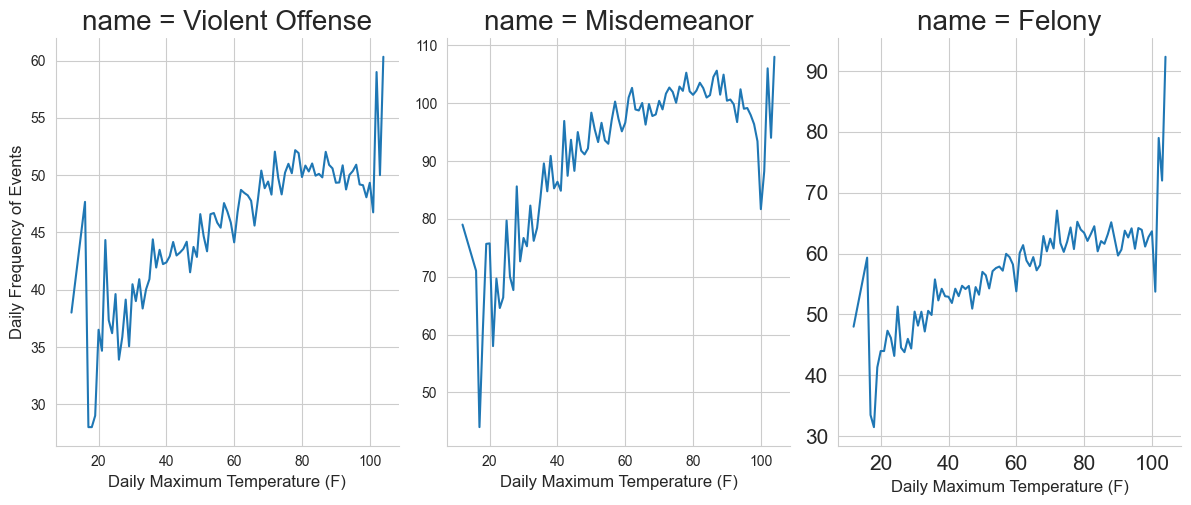

In [77]:
import seaborn as sns
import numpy as np
outcome_vs_temper = sns.relplot(x='tmax', y='value', data=df, col='name',
                                kind='line',
                                facet_kws={'sharey': False}, col_wrap=3,
                                estimator=np.mean,
                                errorbar=None,
                                height=5, aspect=0.8,
                                hue_order=['Felony', 'Misdemeanor', 'Violent Offense'],
                                palette='bright')

outcome_vs_temper.set_xlabels('Daily Maximum Temperature (F)', fontsize=12)
outcome_vs_temper.set_ylabels('Daily Frequency of Events', fontsize=12)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# increase the facet font
for ax in outcome_vs_temper.axes.flatten():
    ax.set_title(ax.get_title(), fontsize=20)

plt.savefig('presentation/figures/outcome_vs_temper.png', bbox_inches='tight')
plt.show()